In [91]:
import pandas as pd
import numpy as np
df = pd.read_csv('titanic.csv')
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [22]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [26]:
df.duplicated().sum()

0

In [29]:
sex_counts = df['Sex'].value_counts()
sex_counts

Sex
male      577
female    314
Name: count, dtype: int64

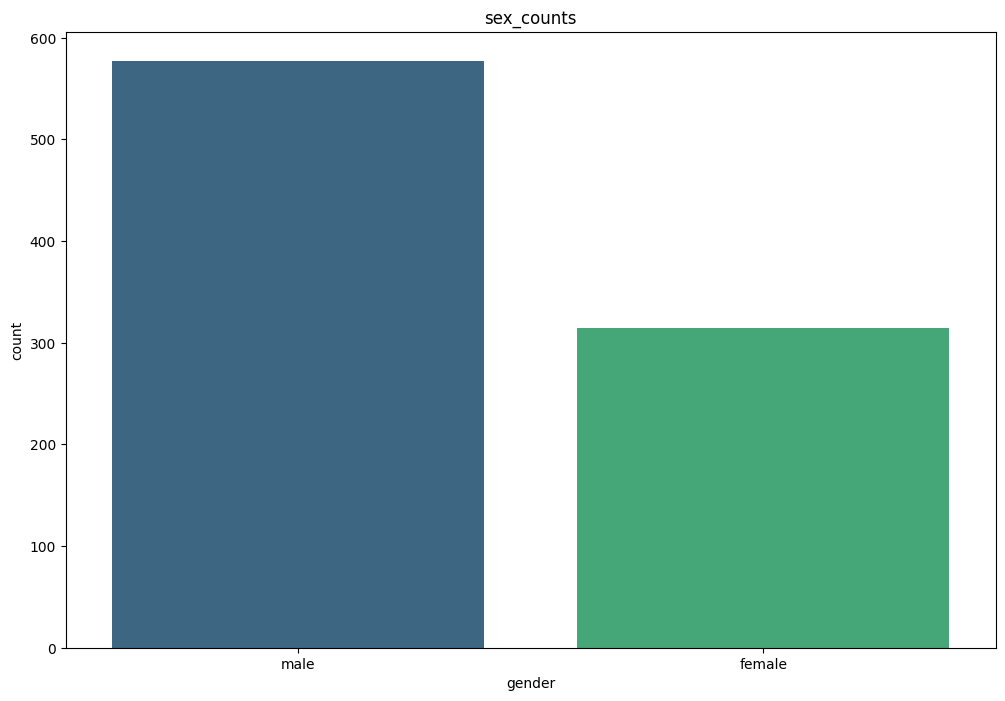

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,8))
sns.barplot(x=sex_counts.index,y=sex_counts.values,palette='viridis',hue=sex_counts.index)
plt.title('sex_counts')
plt.xlabel('gender')
plt.ylabel('count')
plt.show()

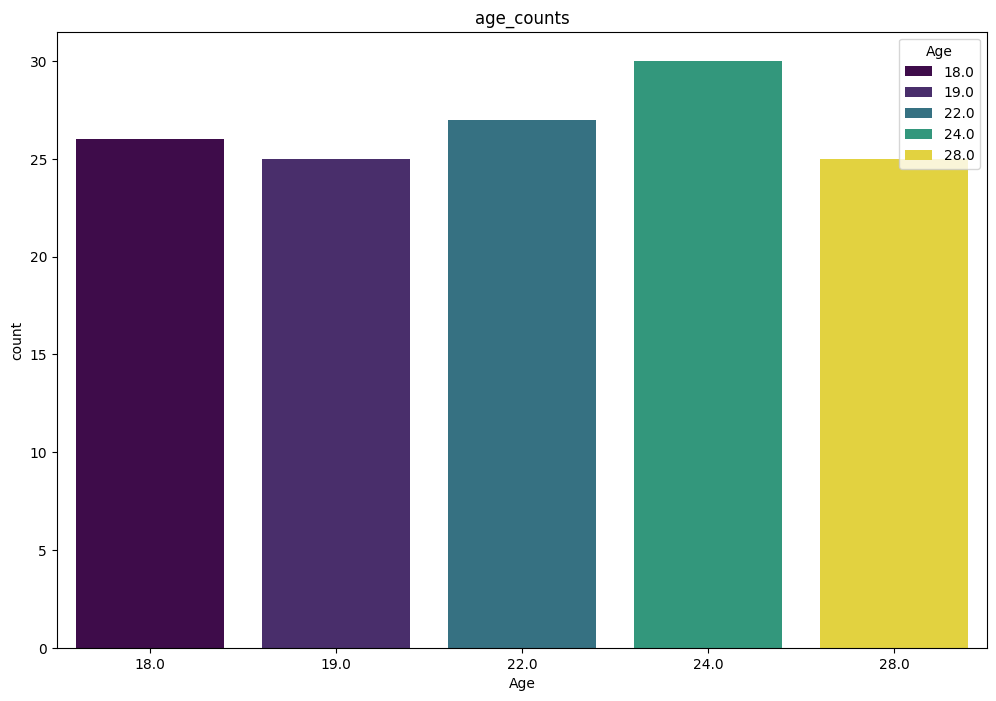

Age
24.0    30
22.0    27
18.0    26
19.0    25
28.0    25
Name: count, dtype: int64

In [66]:
#the most 5 age in data
age_counts= df['Age'].value_counts().head()

plt.figure(figsize=(12,8))
sns.barplot(x=age_counts.index,y=age_counts.values,palette='viridis',hue=age_counts.index)
plt.title('age_counts')
plt.xlabel('Age')
plt.ylabel('count')
plt.show()
age_counts

In [68]:
# PClass
pclass_counts= df['Pclass'].value_counts()
pclass_counts

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

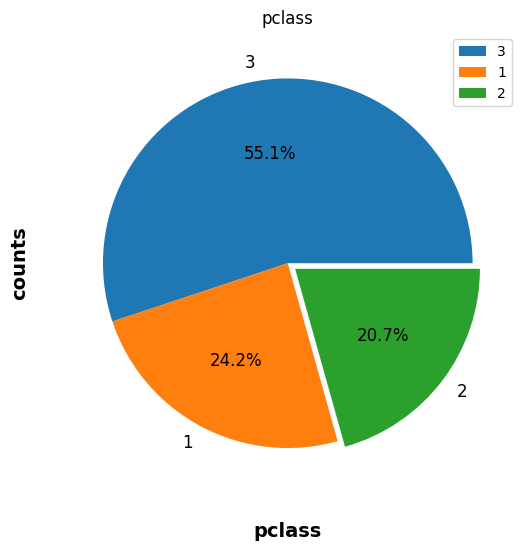

In [69]:
plt.figure(figsize = (20, 6))
explode = (0,0,0.05)
pclass_counts.plot(kind = 'pie', fontsize = 12, explode = explode, autopct = '%.1f%%')
plt.title('pclass')
plt.xlabel('pclass', weight = "bold", color = "#000000", fontsize = 14, labelpad = 20)
plt.ylabel('counts', weight = "bold", color = "#000000", fontsize = 14, labelpad = 20)
plt.legend(labels = pclass_counts.index, loc = "best")
plt.show()

In [71]:
SibSp_counts= df['SibSp'].value_counts()
SibSp_counts

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

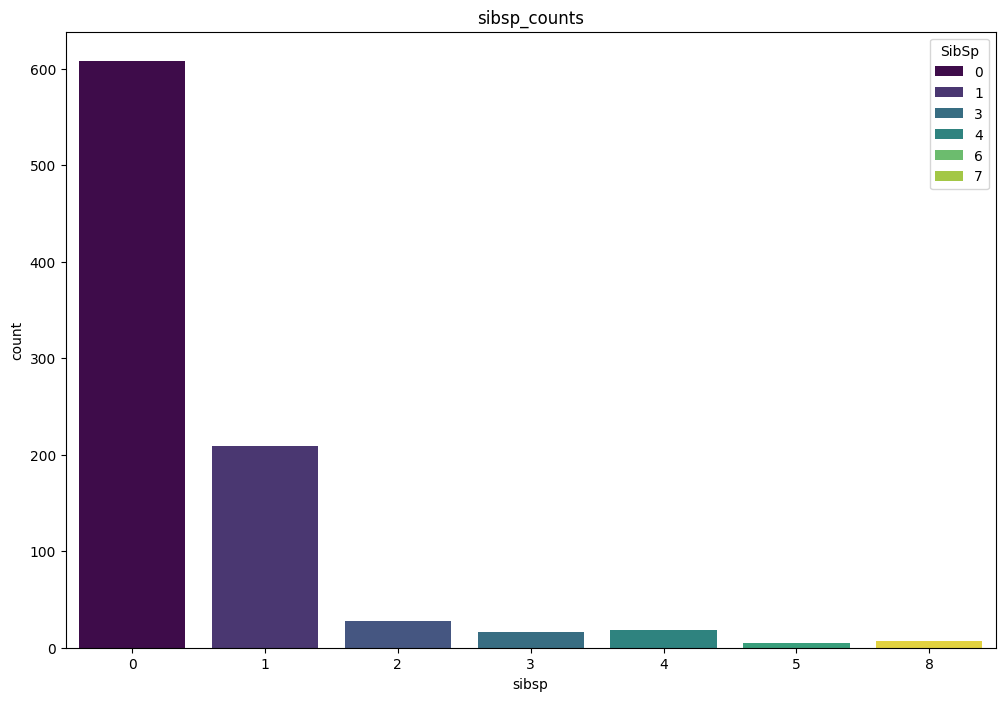

In [74]:
plt.figure(figsize=(12,8))
sns.barplot(x=SibSp_counts.index,y=SibSp_counts.values,palette='viridis',hue=SibSp_counts.index)
plt.title('sibsp_counts')
plt.xlabel('sibsp')
plt.ylabel('count')
plt.show()

In [75]:
Parch_counts= df['Parch'].value_counts()
Parch_counts

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

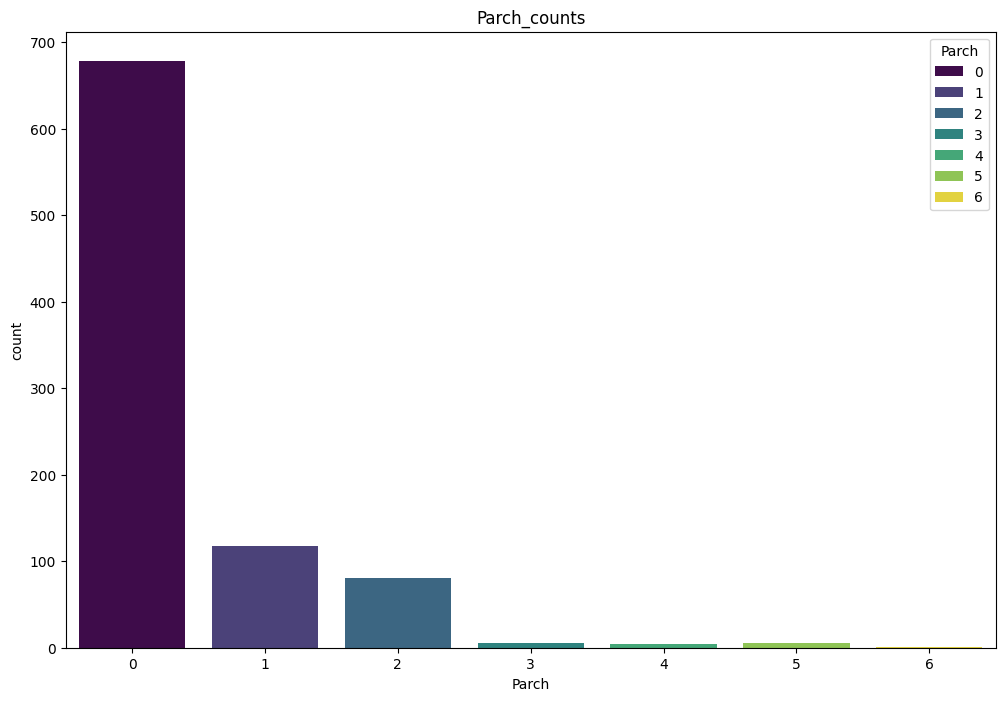

In [77]:
plt.figure(figsize=(12,8))
sns.barplot(x=Parch_counts.index,y=Parch_counts.values,palette='viridis',hue=Parch_counts.index)
plt.title('Parch_counts')
plt.xlabel('Parch')
plt.ylabel('count')
plt.show()

In [80]:
Embarked_counts= df['Embarked'].value_counts()
Embarked_counts

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

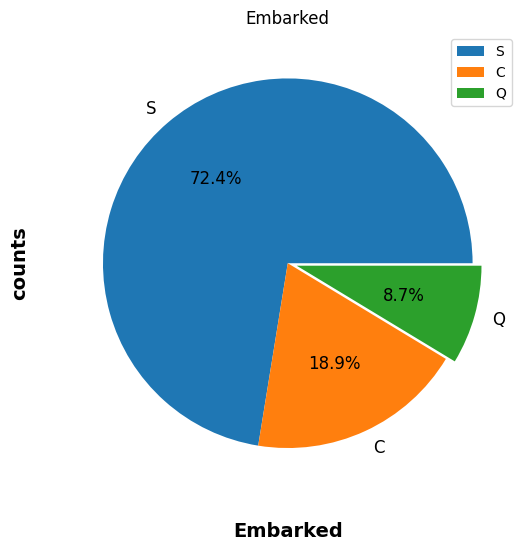

In [81]:
plt.figure(figsize = (20, 6))
explode = (0,0,0.05)
Embarked_counts.plot(kind = 'pie', fontsize = 12, explode = explode, autopct = '%.1f%%')
plt.title('Embarked')
plt.xlabel('Embarked', weight = "bold", color = "#000000", fontsize = 14, labelpad = 20)
plt.ylabel('counts', weight = "bold", color = "#000000", fontsize = 14, labelpad = 20)
plt.legend(labels = Embarked_counts.index, loc = "best")
plt.show()

In [82]:
# Survival Count
Survived_counts= df['Survived'].value_counts()
Survived_counts

Survived
0    549
1    342
Name: count, dtype: int64

In [83]:
# Survival Rate
survival_rate = df['Survived'].mean()
print(f"Overall Survival Rate: {survival_rate:.2%}")

Overall Survival Rate: 38.38%


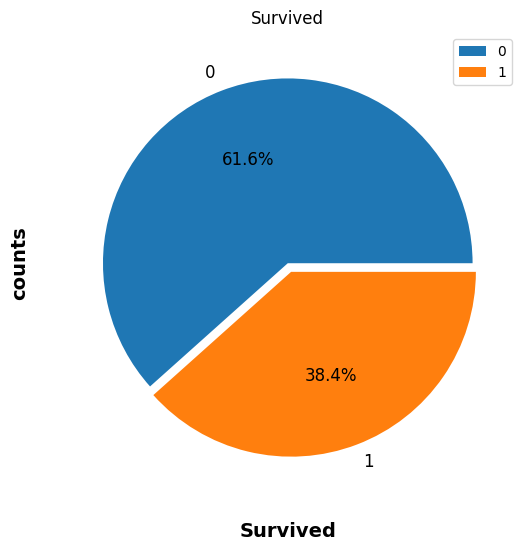

In [103]:
plt.figure(figsize = (20, 6))
explode = (0,0.05)
Survived_counts.plot(kind = 'pie', fontsize = 12, explode = explode, autopct = '%.1f%%')
plt.title('Survived')
plt.xlabel('Survived', weight = "bold", color = "#000000", fontsize = 14, labelpad = 20)
plt.ylabel('counts', weight = "bold", color = "#000000", fontsize = 14, labelpad = 20)
plt.legend(labels = Survived_counts.index, loc = "best")
plt.show()

In [101]:
# Survival rate by gender
gender_survival = df.groupby('Sex')['Survived'].mean()

# Add percentage and ratio
gender_survival = gender_survival.to_frame(name='Survival Rate')
gender_survival['Percentage'] = gender_survival['Survival Rate'] * 100
gender_survival['Ratio'] = gender_survival['Survival Rate'] / (1 - gender_survival['Survival Rate'])

# Display the results
print("Survival Rate, Percentage, and Ratio based on Gender:")
print(gender_survival)

Survival Rate, Percentage, and Ratio based on Gender:
        Survival Rate  Percentage     Ratio
Sex                                        
female       0.742038   74.203822  2.876543
male         0.188908   18.890815  0.232906


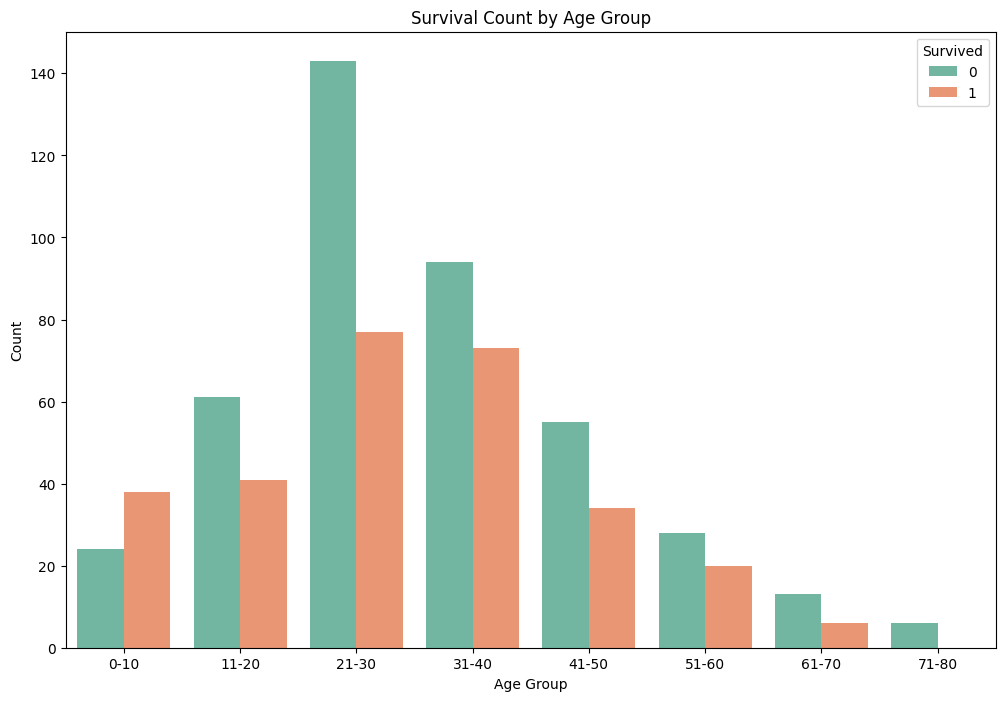

In [111]:
# Create age groups
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Create a countplot for age groups and survival
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='AgeGroup', hue='Survived', palette='Set2')
plt.title('Survival Count by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

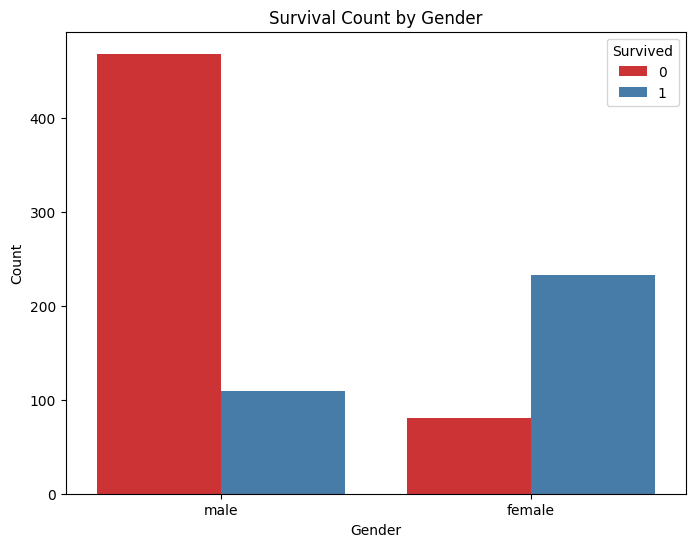

In [110]:
# Create a countplot for gender and survival
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Sex', hue='Survived', palette='Set1')
plt.title('Survival Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

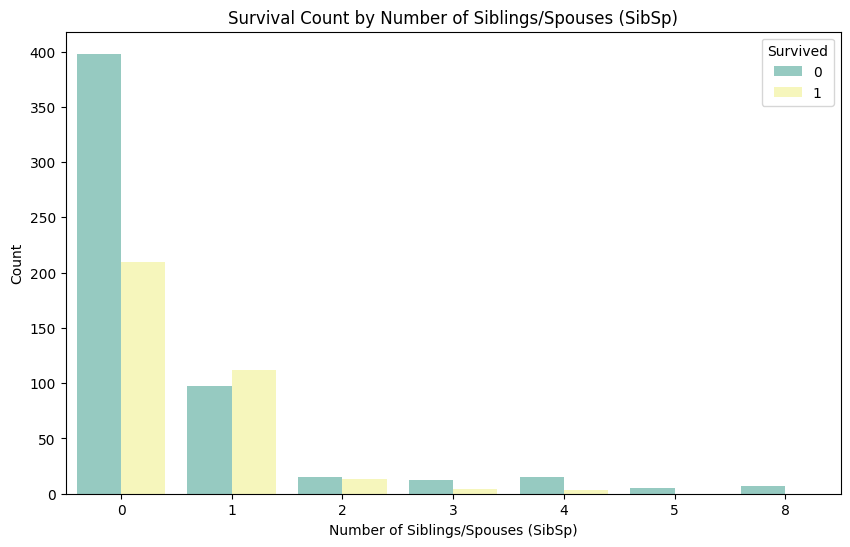

In [115]:
# Create a countplot for SibSp and survival
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='SibSp', hue='Survived', palette='Set3')
plt.title('Survival Count by Number of Siblings/Spouses (SibSp)')
plt.xlabel('Number of Siblings/Spouses (SibSp)')
plt.ylabel('Count')
plt.show()

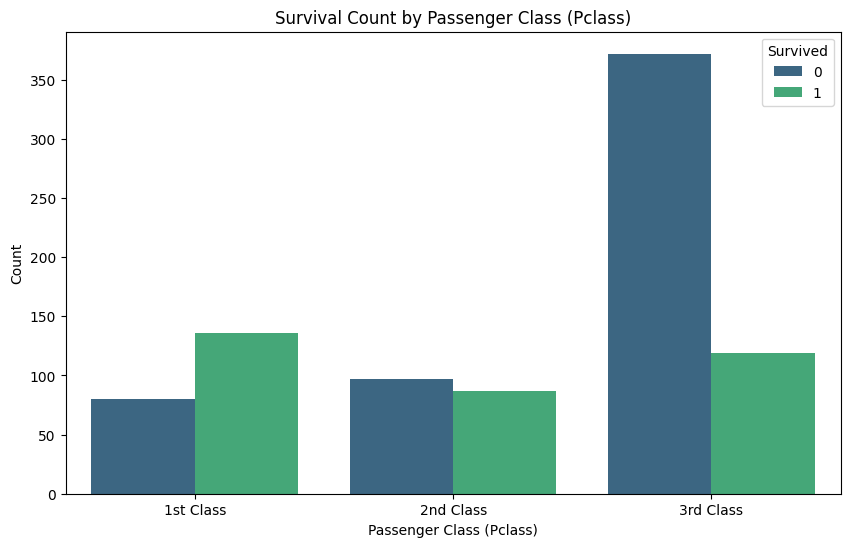

In [117]:
# Create a countplot for Pclass and survival
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Pclass', hue='Survived', palette='viridis')
plt.title('Survival Count by Passenger Class (Pclass)')
plt.xlabel('Passenger Class (Pclass)')
plt.ylabel('Count')
plt.xticks([0, 1, 2], ['1st Class', '2nd Class', '3rd Class'])
plt.show()

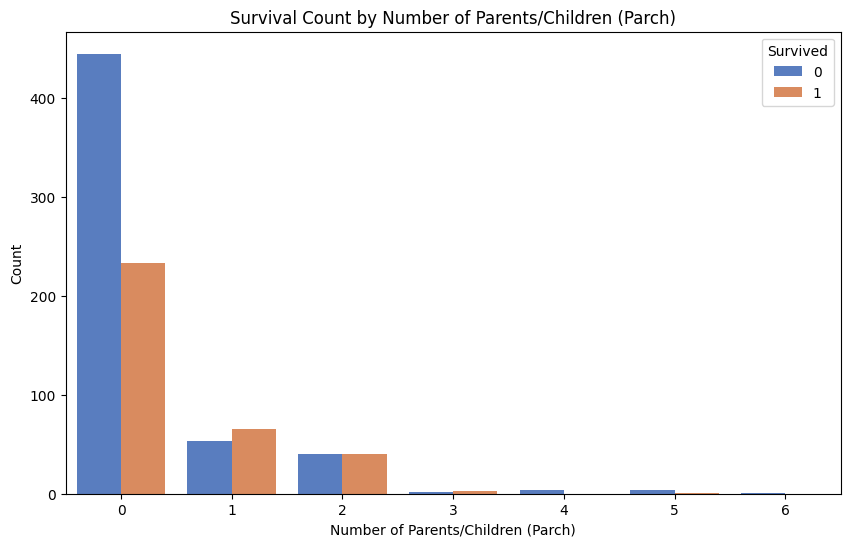

In [119]:
# Create a countplot for Parch and survival
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Parch', hue='Survived', palette='muted')
plt.title('Survival Count by Number of Parents/Children (Parch)')
plt.xlabel('Number of Parents/Children (Parch)')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.show()

In [123]:
# Data Preprocessing
titanic= df.drop(columns=['PassengerId', 'Name', 'Cabin', 'Ticket', 'AgeGroup'], axis=1)
titanic.head()

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S

In [124]:
# convert the gender to binary 0 and 1
titanic['Sex']=titanic['Sex'].replace({'male':1,'female':0})
titanic.head()

Survived  Pclass  Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    1  22.0      1      0   7.2500        S
1         1       1    0  38.0      1      0  71.2833        C
2         1       3    0  26.0      0      0   7.9250        S
3         1       1    0  35.0      1      0  53.1000        S
4         0       3    1  35.0      0      0   8.0500        S

In [125]:
# Fill missing values in age column by imputing the median
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)
titanic.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [126]:
# Fill missing values in embarked column by imputing the mode
titanic["Embarked"].fillna(titanic["Embarked"].mode()[0], inplace=True)
titanic.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [127]:
titanic['Embarked']=titanic['Embarked'].replace({'S':1,'C':2,'Q':3})
titanic.head()

Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         0       3    1  22.0      1      0   7.2500         1
1         1       1    0  38.0      1      0  71.2833         2
2         1       3    0  26.0      0      0   7.9250         1
3         1       1    0  35.0      1      0  53.1000         1
4         0       3    1  35.0      0      0   8.0500         1

In [128]:
# Correlation between numerical columns
titanic.corr()

Survived    Pclass       Sex       Age     SibSp     Parch  \
Survived  1.000000 -0.338481 -0.543351 -0.064910 -0.035322  0.081629   
Pclass   -0.338481  1.000000  0.131900 -0.339898  0.083081  0.018443   
Sex      -0.543351  0.131900  1.000000  0.081163 -0.114631 -0.245489   
Age      -0.064910 -0.339898  0.081163  1.000000 -0.233296 -0.172482   
SibSp    -0.035322  0.083081 -0.114631 -0.233296  1.000000  0.414838   
Parch     0.081629  0.018443 -0.245489 -0.172482  0.414838  1.000000   
Fare      0.257307 -0.549500 -0.182333  0.096688  0.159651  0.216225   
Embarked  0.106811  0.045702 -0.116569 -0.009165 -0.059961 -0.078665   

              Fare  Embarked  
Survived  0.257307  0.106811  
Pclass   -0.549500  0.045702  
Sex      -0.182333 -0.116569  
Age       0.096688 -0.009165  
SibSp     0.159651 -0.059961  
Parch     0.216225 -0.078665  
Fare      1.000000  0.062142  
Embarked  0.062142  1.000000

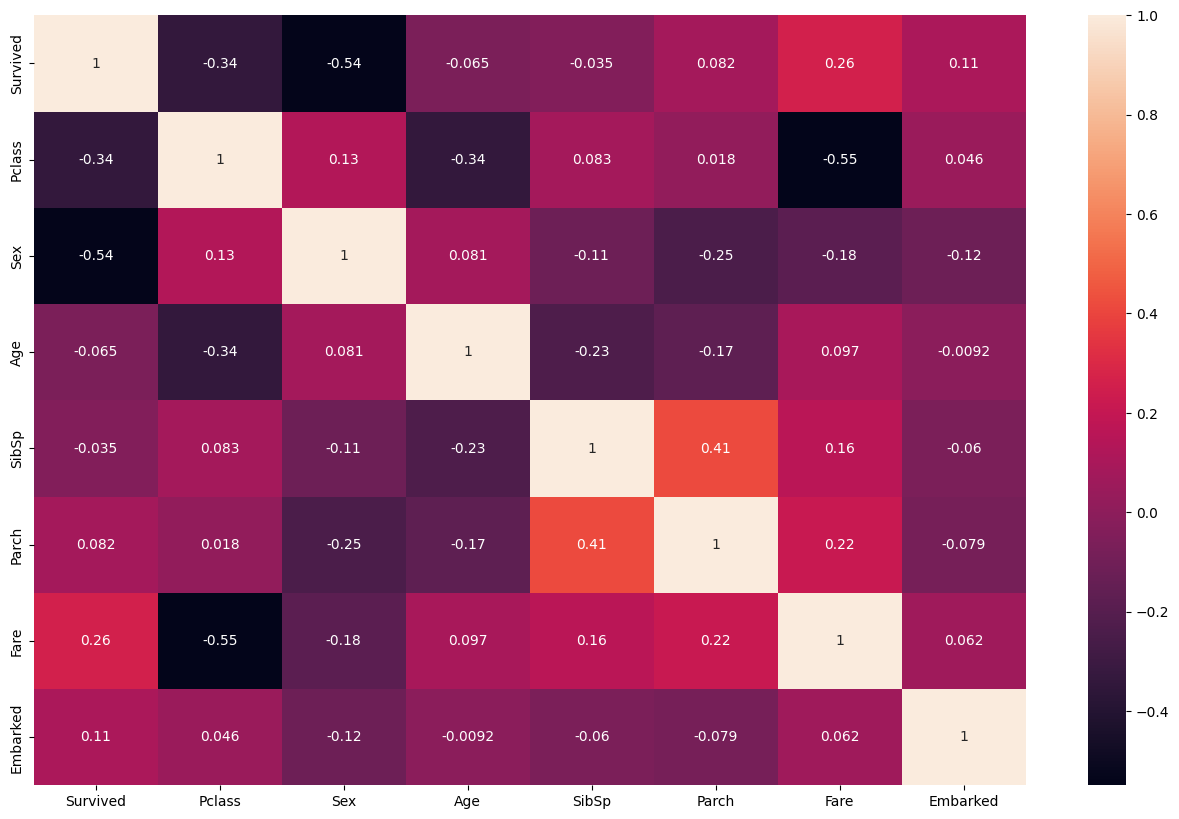

In [160]:
plt.figure(figsize=(16, 10))
sns.heatmap(titanic.corr(), annot=True)
plt.show()
# Positive correlation values (closer to 1) indicate a positive relationship, while negative values (closer to -1) indicate a negative relationship.
# A correlation value closer to 0 suggests a weaker correlation.
# Focus on the 'Survived' column to identify any numerical features strongly correlated with survival.

In [139]:
# How does the age distribution vary among different passenger classes who survived and those who did not?
# Group by Pclass and Survived, then calculate summary statistics for Age
age_stats = df.groupby(['Pclass', 'Survived'])['Age'].describe()[['mean', '50%']].reset_index()

# Rename columns for better readability
age_stats = age_stats.rename(columns={'mean': 'Mean Age', '50%': 'Median Age'})

# Print the summary statistics
print(age_stats)


   Pclass  Survived   Mean Age  Median Age
0       1         0  43.695312       45.25
1       1         1  35.368197       35.00
2       2         0  33.544444       30.50
3       2         1  25.901566       28.00
4       3         0  26.555556       25.00
5       3         1  20.646118       22.00


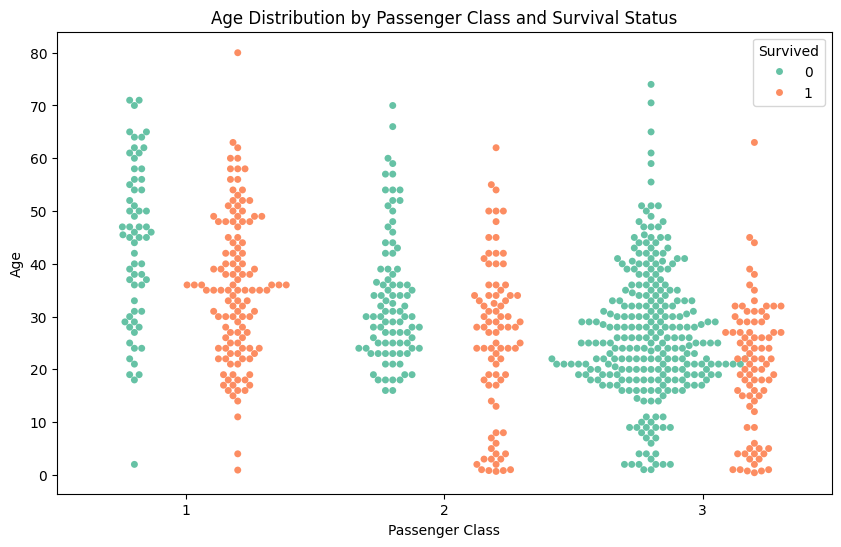

In [138]:
# Create a swarm plot for age distribution
plt.figure(figsize=(10, 6))
sns.swarmplot(data=df, x='Pclass', y='Age', hue='Survived', palette='Set2', dodge=True)
plt.title('Age Distribution by Passenger Class and Survival Status')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.legend(title='Survived', loc='upper right')
plt.show()

Pclass             1         2         3
FamilySize                              
0           0.532110  0.346154  0.212963
1           0.728571  0.529412  0.350877
2           0.750000  0.677419  0.425532
3           0.714286  0.769231  0.666667
4           1.000000  1.000000  0.000000
5           0.500000  1.000000  0.000000
6                NaN       NaN  0.333333
7                NaN       NaN  0.000000
10               NaN       NaN  0.000000


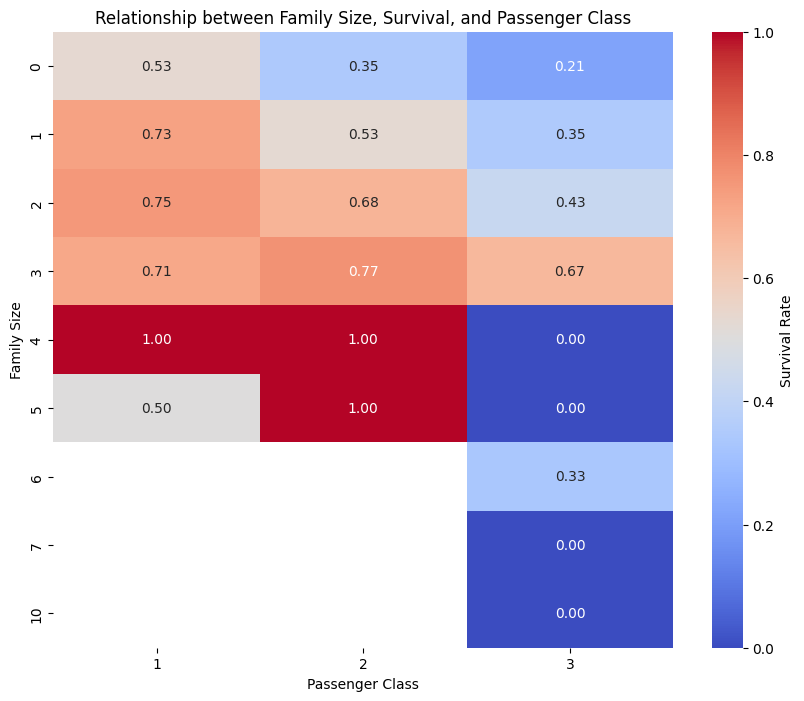

In [150]:
# how the combination of SibSp and Parch (family size) relates to survival?
# Create a new feature 'FamilySize' by adding SibSp and Parch
df['FamilySize'] = df['SibSp'] + df['Parch']

# Create a heatmap to visualize the relationship between FamilySize, Survival, and Pclass
plt.figure(figsize=(10, 8))
table = df.pivot_table(index='FamilySize', columns=['Pclass'], values='Survived', aggfunc='mean')
print(table)
family_survival_heatmap = sns.heatmap(table,
                                      annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={'label': 'Survival Rate'})
plt.title('Relationship between Family Size, Survival, and Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Family Size')
plt.show()

Unique Titles and Counts:
Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64


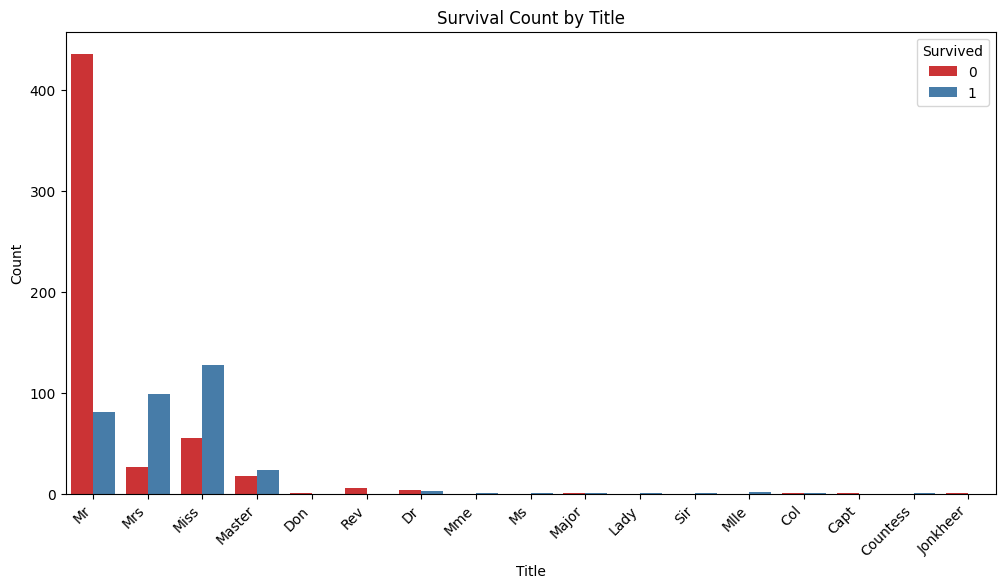

In [153]:
# Are there any patterns or insights that can be extracted from the names of passengers, such as titles or naming conventions, that correlate with survival?
# Extract titles from the 'Name' column
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Display unique titles and their counts
print("Unique Titles and Counts:")
print(df['Title'].value_counts())

# Create a bar plot to visualize survival by title
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Title', hue='Survived', palette='Set1')
plt.title('Survival Count by Title')
plt.xlabel('Title')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Survived', loc='upper right')
plt.show()

Unique Ticket Prefixes and Counts:
TicketPrefix
PC       60
C        33
A        29
STON     18
SOTON    17
S        14
CA       14
SC       13
W        11
F         6
LINE      4
PP        3
P         2
WE        2
SO        1
Fa        1
SW        1
SCO       1
Name: count, dtype: int64


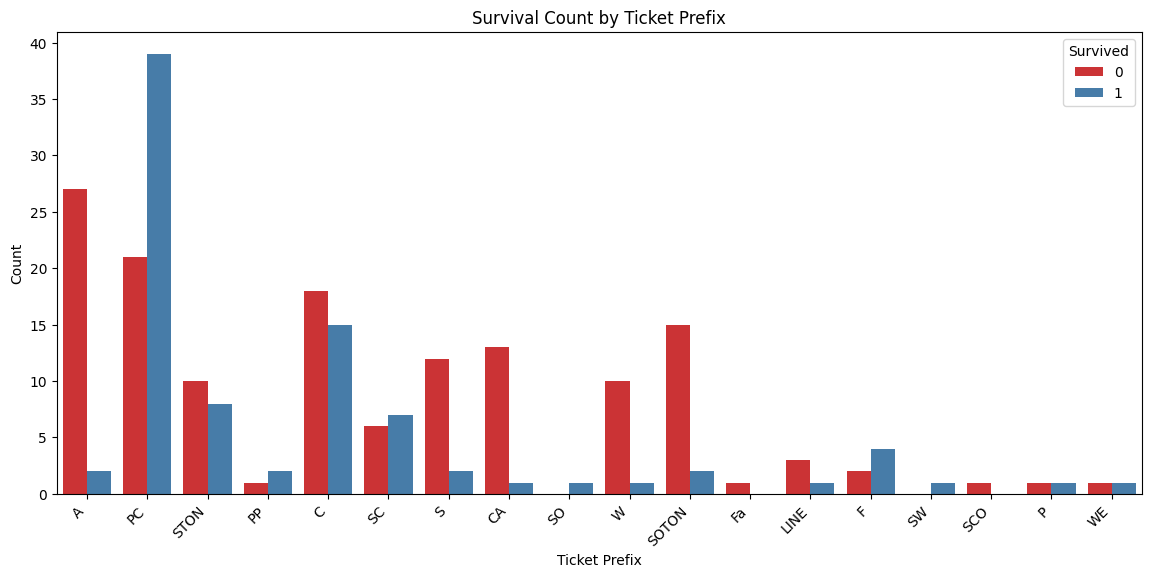

In [162]:
# Investigate whether the prefix of the ticket numbers holds any significance in predicting survival.

# Extract prefixes from the 'Ticket' column
df['TicketPrefix'] = df['Ticket'].str.extract('([A-Za-z]+)', expand=False)

# Display unique prefixes and their counts
print("Unique Ticket Prefixes and Counts:")
print(df['TicketPrefix'].value_counts())

# Create a bar plot to visualize survival by ticket prefix
plt.figure(figsize=(14, 6))
sns.countplot(data=df, x='TicketPrefix', hue='Survived', palette='Set1')
plt.title('Survival Count by Ticket Prefix')
plt.xlabel('Ticket Prefix')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Survived', loc='upper right')
plt.show()